In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from scipy.special import comb

In [3]:
p_h, p_t = 0.8, 0.2
N = [10, 50, 100]
delta = np.linspace(0, 1, num=10, endpoint=True)

MemoryError: 

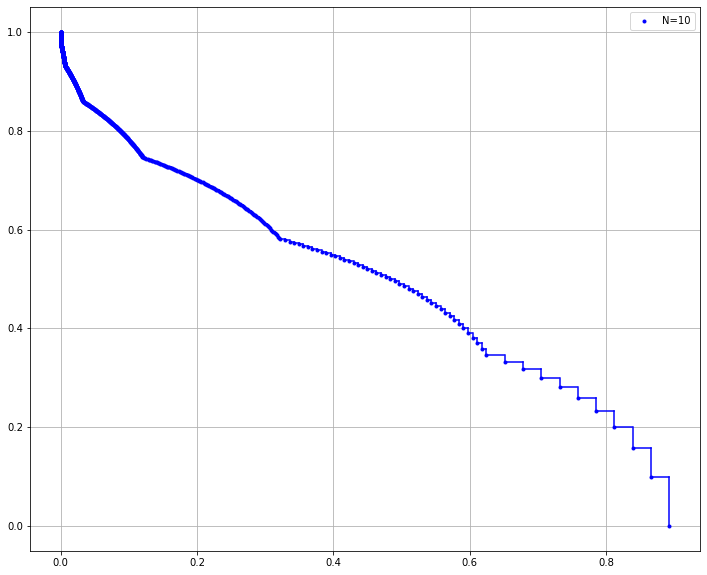

In [4]:
def essential_bit_content(p, N=1):
    probs = []
    for k in range(N + 1):
        p_N_k = (p ** k) * ((1 - p) ** (N - k))
        probs.extend([p_N_k for _ in range(int(comb(N, k)))])
    
    deltas = [0]
    avg_essential_bit_contents = [1]
    delta = 0

    while len(probs) > 1:
        delta += probs.pop(0)
        deltas.append(delta)
        avg_essential_bit_content = log2(len(probs)) / N
        avg_essential_bit_contents.append(avg_essential_bit_content)
        
    return deltas, avg_essential_bit_contents



def plot_essential_bit_content(D, H, N=None):
    plt.figure(figsize=(12, 10))
    plt.plot(D, H, 'b.', label="N={}".format(N))
    for i in range(len(D) - 1):
        xs = np.linspace(D[i], D[i+1], endpoint=False)
        plt.plot(xs, np.repeat(H[i], len(xs)), 'b')
        ys = np.linspace(H[i], H[i + 1], endpoint=False)
        plt.plot(np.repeat(D[i + 1], len(ys)), ys, 'b')
    plt.grid()
    plt.legend()



for n in N:
    D, H = essential_bit_content(p=p_h, N=n)
    plot_essential_bit_content(D, H, N=n)